# Integrated PK/PD Engineering Pipeline

This notebook demonstrates a streamlined **PK/PD workflow** combining data cleaning, feature engineering, and clinical labeling with plots.

---

## 1. Data Preparation
- Load and clean NONMEM-style dataset (`EstData.csv`)  
- Infer subject-level dosing: **dose (mg / mg·kg⁻¹), interval (h), # doses**  
- Split into **PK** (concentration) and **PD** (response) observations  

---

## 2. Feature Engineering & Labeling
- PK: `CMAX`, `CAVG`, `AUC`, terminal half-life (`t½`)  
- PD: baseline, last-window response, time-under-threshold (TUT)  
- Generate labels:  
  - **Strict:** `PD_LAST_MAX ≤ 3.3 ng/mL`  
  - **Moderate:** `≤ 7.5 ng/mL`  
  - **Model-based:** EC80, EC90 from Emax fit  

%%%
def emax_inhib(C, E0, Emax, EC50):
    return E0 - Emax * (C / (EC50 + C))
%%%

---

## 3. Reporting & Visualization
- Export subject-level features (`engineered_features_per_subject.csv`)  
- Publish-ready plots:  
  1. **PD_LAST_MAX histogram** with thresholds  
  2. **Success fraction vs threshold** curve  
  3. **PK–PD snapshot** (exposure vs response)  

---


# Pharmacodynamic Analysis

Loaded: EstData.csv shape: (2820, 11)


,ID,BW,COMED,DOSE,TIME,DV,EVID,MDV,AMT,CMT,DVID
0,1,58,0,0,0,18.6174,0,0,0,3,2
1,1,58,0,0,1,13.7783,0,0,0,3,2
2,1,58,0,0,2,16.5747,0,0,0,3,2
3,1,58,0,0,4,16.8486,0,0,0,3,2
4,1,58,0,0,8,18.6459,0,0,0,3,2


Columns: ['ID', 'BW', 'COMED', 'DOSE', 'TIME', 'DV', 'EVID', 'MDV', 'AMT', 'CMT', 'DVID']
After cleaning: (2820, 11)


,ID,BW,COMED,DOSE,TIME,DV,EVID,MDV,AMT,CMT,DVID
0,1,58,0,0,0,18.6174,0,0,0,3,2
1,1,58,0,0,1,13.7783,0,0,0,3,2
2,1,58,0,0,2,16.5747,0,0,0,3,2
3,1,58,0,0,4,16.8486,0,0,0,3,2
4,1,58,0,0,8,18.6459,0,0,0,3,2


Subjects total: 48  |  PK: 36  |  PD: 48
Dosing summary (first 10):


,ID,BW,COMED,DOSE_MG,INTERVAL_H,NUM_DOSES,DOSE_MGKG
0,1,58.0,0,0.0,24.0,0,NaN
1,2,85.0,1,0.0,24.0,0,NaN
2,3,89.0,1,0.0,24.0,0,NaN
3,4,99.0,1,0.0,24.0,0,NaN
4,5,63.0,0,0.0,24.0,0,NaN
5,6,59.0,0,0.0,24.0,0,NaN
6,7,67.0,1,0.0,24.0,0,NaN
7,8,99.0,0,0.0,24.0,0,NaN
8,9,71.0,1,0.0,24.0,0,NaN
9,10,63.0,1,0.0,24.0,0,NaN


Model params: E0=8.684, Emax=18.811, EC50=5.487
Model-based PD thresholds: EC80=-6.365, EC90=-8.247 (ng/mL)

Subjects in dosing table: 48
Subjects with any PK obs: 36
Subjects with any PD obs: 48
Rows in features (union): 48

NaNs per column (non-zero only):
PD_LAST_WINDOW_EXPAND    48
PK_LAST_WINDOW_EXPAND    36
PK_HALF_LIFE_H           25
PK_TERMINAL_R2           25
DOSE_MGKG                12
dtype: int64

Saved: engineered_features_per_subject.csv


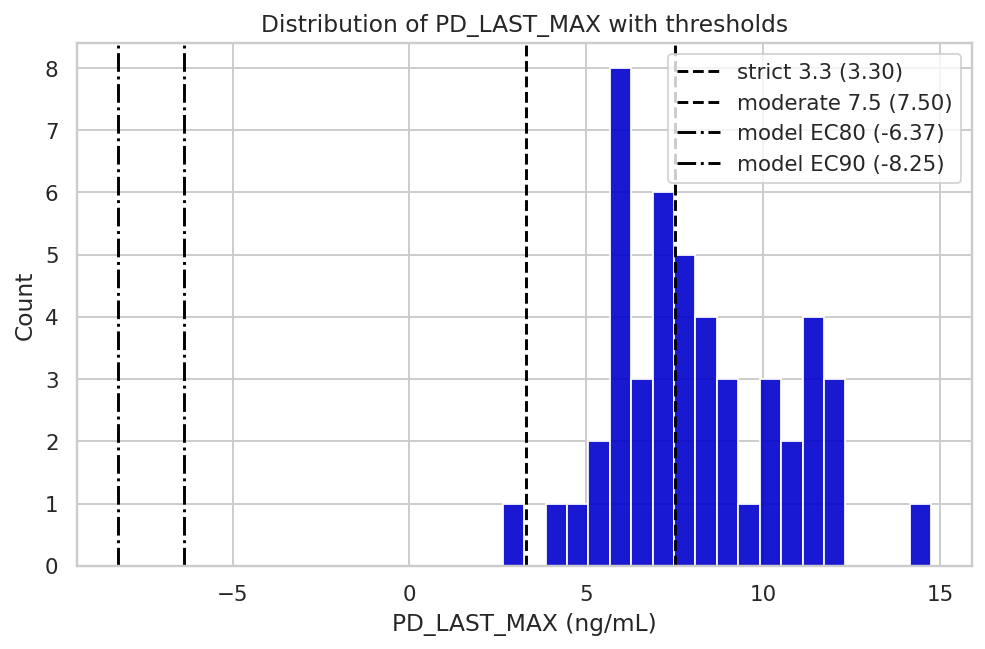

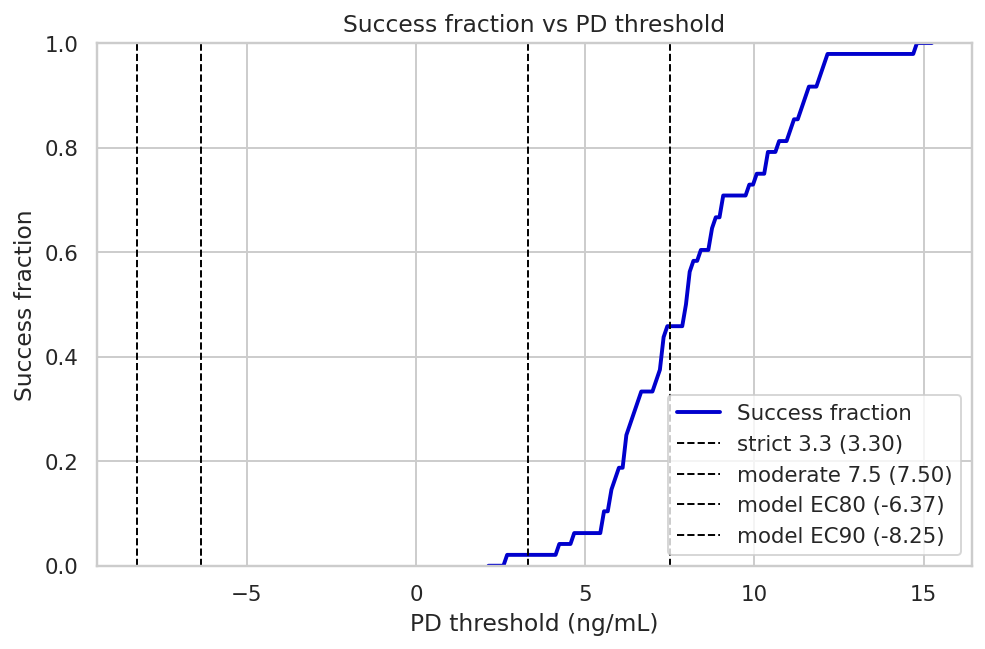

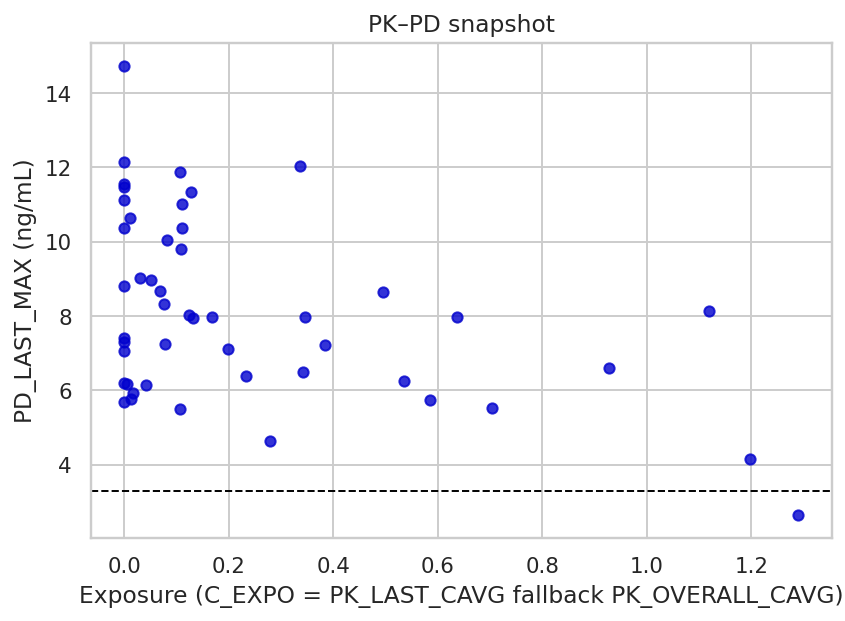

Saved: engineered_features_per_subject_with_labels.csv


,ID,IS_PLACEBO,HAS_PK_DATA,HAS_PD_DATA,DOSE_MG,INTERVAL_H,DOSE_MGKG,PK_LAST_CAVG,PD_LAST_MAX,PD_LAST_MIN,PD_BASELINE,LABEL_PD_LAST_STRICT,LABEL_PD_LAST_MODERATE,LABEL_PD_LAST_EC80,LABEL_PD_LAST_EC90
0,1,1,0,1,0.0,24.0,NaN,0.000000,14.74320,13.69210,17.019750,0,0,0,0
1,2,1,0,1,0.0,24.0,NaN,0.000000,11.48650,9.32379,10.629500,0,0,0,0
2,3,1,0,1,0.0,24.0,NaN,0.000000,5.69835,5.14350,5.274970,0,1,0,0
3,4,1,0,1,0.0,24.0,NaN,0.000000,7.40211,6.50052,7.728405,0,1,0,0
4,5,1,0,1,0.0,24.0,NaN,0.000000,7.05365,5.87879,6.828030,0,1,0,0
5,6,1,0,1,0.0,24.0,NaN,0.000000,10.38130,9.20059,10.954150,0,0,0,0
6,7,1,0,1,0.0,24.0,NaN,0.000000,11.54990,10.84660,9.052065,0,0,0,0
7,8,1,0,1,0.0,24.0,NaN,0.000000,11.11870,7.98162,9.023275,0,0,0,0
8,9,1,0,1,0.0,24.0,NaN,0.000000,8.81286,6.15765,9.027250,0,0,0,0
9,10,1,0,1,0.0,24.0,NaN,0.000000,7.30375,7.19835,6.765040,0,1,0,0


In [1]:
# ──────────────────────────────────────────────────────────────────────────────
# Integrated PK/PD engineering + labeling + plots (Jupyter-ready)
# Base color: #0000CD
# ──────────────────────────────────────────────────────────────────────────────
# (Optional) one-time installs if needed in this kernel:
# !pip install numpy pandas matplotlib seaborn scipy

import os, math, warnings
from typing import Dict, Tuple, List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

# ------------------------------- styling --------------------------------------
BLUE = "#0000CD"  # requested base blue
sns.set_theme(style="whitegrid", context="notebook", palette=[BLUE])
plt.rcParams["figure.dpi"] = 140

# ----------------------------- configuration ----------------------------------
THRESHOLD_PD_STRICT   = 3.3    # ng/mL
THRESHOLD_PD_MODERATE = 7.5    # ng/mL (for sensitivity label)
DEFAULT_INTERVAL_H    = 24.0
DATA_PATHS            = ["EstData.csv", "./EstData.csv"]
FIG_DIR               = "figs_integrated"
os.makedirs(FIG_DIR, exist_ok=True)

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

# ------------------------------- load & clean ---------------------------------
data_path = next((p for p in DATA_PATHS if os.path.exists(p)), None)
if data_path is None:
    raise FileNotFoundError("EstData.csv not found in current folder.")

df = pd.read_csv(data_path)
print("Loaded:", data_path, "shape:", df.shape)
display(df.head())
print("Columns:", list(df.columns))

num_cols = ["ID","BW","COMED","DOSE","TIME","DV","EVID","MDV","AMT","CMT","DVID"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

essential = ["ID","TIME","EVID","MDV","DVID"]
df = (df
      .dropna(subset=[c for c in essential if c in df.columns])
      .query("TIME >= 0")
      .sort_values(["ID","TIME"])
      .drop_duplicates()
      .reset_index(drop=True)
     )

print("After cleaning:", df.shape)
display(df.head())

# ------------------------------- slices ---------------------------------------
obs   = df[(df["EVID"]==0) & (df["MDV"]==0)].copy()
pk    = obs[obs["DVID"]==1].copy()
pd_df = obs[obs["DVID"]==2].copy()

print(f"Subjects total: {df['ID'].nunique()}  |  PK: {pk['ID'].nunique()}  |  PD: {pd_df['ID'].nunique()}")

# --------------------------- dosing inference ---------------------------------
def infer_dosing_schedule(sdf: pd.DataFrame) -> Dict[str, float]:
    """Infer per-subject dose (mg), interval (h), and #doses from raw rows."""
    dose_rows = sdf[sdf["EVID"] == 1]
    if not dose_rows.empty:
        if "AMT" in dose_rows and dose_rows["AMT"].notna().any():
            dose_mg = float(dose_rows["AMT"].median())
        else:
            dose_mg = float(sdf["DOSE"].replace(0, np.nan).median())
        t = np.sort(dose_rows["TIME"].dropna().unique())
        interval_h = float(np.median(np.diff(t))) if len(t) >= 2 else DEFAULT_INTERVAL_H
        num_doses = int(dose_rows.shape[0])
    else:
        dose_mg = float(sdf["DOSE"].replace(0, np.nan).median())
        interval_h = DEFAULT_INTERVAL_H
        Tmax = float(sdf["TIME"].max()) if sdf["TIME"].notna().any() else 0.0
        num_doses = max(0, int(round(Tmax/interval_h))) if np.isfinite(dose_mg) and dose_mg > 0 else 0
    if (not np.isfinite(dose_mg)) or (dose_mg < 0):
        dose_mg = 0.0
    return {"dose_mg": dose_mg, "interval_h": interval_h, "num_doses": num_doses}

rows = []
for sid, sdf in df.groupby("ID"):
    info = infer_dosing_schedule(sdf)
    bw = float(sdf["BW"].dropna().iloc[0]) if "BW" in sdf and sdf["BW"].notna().any() else np.nan
    comed = int(sdf["COMED"].dropna().iloc[0]) if "COMED" in sdf and sdf["COMED"].notna().any() else 0
    rows.append({
        "ID": int(sid), "BW": bw, "COMED": comed,
        "DOSE_MG": info["dose_mg"], "INTERVAL_H": info["interval_h"], "NUM_DOSES": info["num_doses"],
        "DOSE_MGKG": (info["dose_mg"]/bw) if (pd.notna(bw) and bw>0 and info["dose_mg"]>0) else np.nan
    })
dose_summary = pd.DataFrame(rows).sort_values("ID").reset_index(drop=True)
dose_summary.loc[dose_summary["DOSE_MG"]<=0, "NUM_DOSES"] = 0
print("Dosing summary (first 10):")
display(dose_summary.head(10))

# ------------------------ feature helpers (de-duped) --------------------------
def auc_trapz_safe(time: np.ndarray, y: np.ndarray) -> float:
    if time is None or y is None or len(time) < 2:
        return 0.0
    return float(np.trapz(y, time))

def get_last_window_with_min_points(sdf: pd.DataFrame, interval_h: float,
                                    min_points: int = 3, max_expand: float = 8.0):
    """Try windows up to max_expand×τ ending at last time; return best window even if <min_points."""
    if sdf.empty:
        return sdf.iloc[0:0].copy(), 1.0, 0
    s = sdf.sort_values("TIME")
    tmax = float(s["TIME"].max()); factor = 1.0
    best, bestn = s.iloc[0:0].copy(), 0
    while factor <= max_expand:
        w = s[(s["TIME"] >= tmax - interval_h*factor) & (s["TIME"] <= tmax)].copy()
        n = len(w)
        if n > bestn:
            best, bestn = w, n
        if n >= min_points:
            return w.sort_values("TIME"), factor, n
        factor *= 1.5
    return best.sort_values("TIME"), None, bestn

def time_under_threshold(time, resp, thresh):
    t = np.asarray(time, float); r = np.asarray(resp, float)
    if t.size < 2: return 0.0
    mask = (r <= thresh).astype(float)
    return float(np.trapz(mask, t))

def estimate_terminal_half_life(time, conc, min_points: int = 4, max_tail: int = 8):
    t = np.asarray(time, float); c = np.asarray(conc, float)
    pos = c > 0
    t, c = t[pos], c[pos]
    if t.size < min_points: return np.nan, np.nan
    take = min(max_tail, t.size)
    t, c = t[-take:], c[-take:]
    if t.size >= 2 and not np.all(np.diff(c) <= 0):  # require decreasing tail
        return np.nan, np.nan
    ln_c = np.log(c)
    slope, intercept = np.polyfit(t, ln_c, 1)
    if slope >= 0: return np.nan, np.nan
    yhat = slope*t + intercept
    ss_res = float(np.sum((ln_c - yhat)**2))
    ss_tot = float(np.sum((ln_c - np.mean(ln_c))**2))
    r2 = 1.0 - ss_res/ss_tot if ss_tot > 0 else np.nan
    ke = -slope
    return float(math.log(2)/ke), r2

def subject_pd_baseline(sdf: pd.DataFrame, dose_times: np.ndarray | None) -> float:
    if sdf.empty: return np.nan
    s = sdf.sort_values("TIME")
    if dose_times is not None and len(dose_times):
        first_dose_time = float(np.min(dose_times))
        pre = s[s["TIME"] < first_dose_time]
        if not pre.empty: return float(pre["DV"].median())
    early = s[s["TIME"] <= (s["TIME"].min()+12.0)]
    return float((early["DV"].median() if not early.empty else s["DV"].median()))

# -------------------------- feature engineering --------------------------------
dose_summary_fixed = dose_summary.copy()
ids_pk = set(pk["ID"].unique()); ids_pd = set(pd_df["ID"].unique())
all_ids = sorted(set(dose_summary_fixed["ID"]) | ids_pk | ids_pd)

# PK features
pk_rows = []
for sid in all_ids:
    s = pk[pk["ID"]==sid].sort_values("TIME").copy()
    di = dose_summary_fixed[dose_summary_fixed["ID"]==sid]
    tau = float(di["INTERVAL_H"].iloc[0]) if (not di.empty and pd.notna(di["INTERVAL_H"].iloc[0])) else DEFAULT_INTERVAL_H
    t = s["TIME"].to_numpy() if "TIME" in s else np.array([], float)
    c = s["DV"].to_numpy()   if "DV" in s   else np.array([], float)
    w, f, n = get_last_window_with_min_points(s, tau, min_points=3, max_expand=8.0)
    tw = w["TIME"].to_numpy() if "TIME" in w else np.array([], float)
    cw = w["DV"].to_numpy()   if "DV" in w   else np.array([], float)
    t_half, r2 = estimate_terminal_half_life(t, c)
    pk_rows.append({
        "ID": int(sid),
        "PK_OVERALL_CMAX": (float(np.nanmax(c)) if c.size else np.nan),
        "PK_OVERALL_CMIN": (float(np.nanmin(c)) if c.size else np.nan),
        "PK_OVERALL_CAVG": (float(np.nanmean(c)) if c.size else np.nan),
        "PK_OVERALL_AUC":  auc_trapz_safe(t, c),
        "PK_LAST_CMAX": (float(np.nanmax(cw)) if cw.size else np.nan),
        "PK_LAST_CMIN": (float(np.nanmin(cw)) if cw.size else np.nan),
        "PK_LAST_CAVG": (float(np.nanmean(cw)) if cw.size else np.nan),
        "PK_LAST_AUC":  (auc_trapz_safe(tw-(tw[0] if tw.size else 0.0), cw) if cw.size else 0.0),
        "PK_LAST_WINDOW_NPTS": int(n),
        "PK_LAST_WINDOW_EXPAND": (float(f) if f is not None else np.nan),
        "PK_HALF_LIFE_H": t_half,
        "PK_TERMINAL_R2": r2,
    })
pk_feat = pd.DataFrame(pk_rows)

# PD features
pd_rows = []
for sid in all_ids:
    s = pd_df[pd_df["ID"]==sid].sort_values("TIME").copy()
    di = dose_summary_fixed[dose_summary_fixed["ID"]==sid]
    tau = float(di["INTERVAL_H"].iloc[0]) if (not di.empty and pd.notna(di["INTERVAL_H"].iloc[0])) else DEFAULT_INTERVAL_H
    dose_times = None  # can be wired if explicit dose times are needed later
    base = subject_pd_baseline(s, dose_times)
    w, f, n = get_last_window_with_min_points(s, tau, min_points=3, max_expand=8.0)
    tw = w["TIME"].to_numpy() if "TIME" in w else np.array([], float)
    rw = w["DV"].to_numpy()   if "DV" in w   else np.array([], float)
    if rw.size:
        last_max  = float(np.nanmax(rw))
        last_min  = float(np.nanmin(rw))
        last_mean = float(np.nanmean(rw))
        last_auc  = auc_trapz_safe(tw-(tw[0] if tw.size else 0.0), rw)
        tut       = time_under_threshold(tw, rw, THRESHOLD_PD_STRICT)
        pct_red_min = float((base - last_min)/base*100.0) if (pd.notna(base) and base>0) else np.nan
    else:
        last_max = last_min = last_mean = base
        last_auc = 0.0 if pd.notna(base) else np.nan
        tut = 0.0 if pd.notna(base) else np.nan
        pct_red_min = (0.0 if (pd.notna(base) and base>0) else np.nan)
    t_all = s["TIME"].to_numpy() if "TIME" in s else np.array([], float)
    r_all = s["DV"].to_numpy()   if "DV" in s   else np.array([], float)
    pd_rows.append({
        "ID": int(sid),
        "PD_BASELINE": base,
        "PD_LAST_MIN": last_min,
        "PD_LAST_MAX": last_max,
        "PD_LAST_MEAN": last_mean,
        "PD_LAST_AUC": last_auc,
        "PD_LAST_WINDOW_NPTS": int(n),
        "PD_LAST_WINDOW_EXPAND": (float(f) if f is not None else np.nan),
        "PD_TIME_UNDER_THRESH_H": tut,
        "PD_PCT_REDUCTION_MIN_%": pct_red_min,
        "PD_OVERALL_MAX": (float(np.nanmax(r_all)) if r_all.size else np.nan),
        "PD_OVERALL_MIN": (float(np.nanmin(r_all)) if r_all.size else np.nan),
        "PD_OVERALL_MEAN": (float(np.nanmean(r_all)) if r_all.size else np.nan),
        "PD_OVERALL_AUC": (auc_trapz_safe(t_all-(t_all[0] if t_all.size else 0.0), r_all) if r_all.size else 0.0),
    })
pd_feat = pd.DataFrame(pd_rows)

# Merge
feat = (pd.DataFrame({"ID": all_ids})
        .merge(dose_summary_fixed, on="ID", how="left")
        .merge(pk_feat, on="ID", how="left")
        .merge(pd_feat, on="ID", how="left"))

# Flags
feat["HAS_PK_DATA"] = feat["ID"].isin(ids_pk).astype("Int64")
feat["HAS_PD_DATA"] = feat["ID"].isin(ids_pd).astype("Int64")
feat["IS_PLACEBO"]  = ((feat["DOSE_MG"]<=0) & feat["DOSE_MG"].notna()).astype("Int64")

# Placebo zeroing (exposures only)
placebo_mask = feat["IS_PLACEBO"] == 1
for c in ["PK_OVERALL_CMAX","PK_OVERALL_CMIN","PK_OVERALL_CAVG","PK_OVERALL_AUC",
          "PK_LAST_CMAX","PK_LAST_CMIN","PK_LAST_CAVG","PK_LAST_AUC"]:
    if c in feat.columns:
        feat.loc[placebo_mask, c] = 0.0
feat.loc[placebo_mask, "PK_HALF_LIFE_H"] = np.nan

# Safe fills for integral/duration PD metrics
feat["PD_LAST_AUC"] = feat["PD_LAST_AUC"].fillna(0.0)
feat["PD_TIME_UNDER_THRESH_H"] = feat["PD_TIME_UNDER_THRESH_H"].fillna(0.0)

# Labels: strict + overall (nullable Int64)
lab_last = pd.Series(pd.NA, index=feat.index, dtype="Int64")
known = feat["PD_LAST_MAX"].notna()
lab_last.loc[known] = (feat.loc[known, "PD_LAST_MAX"] <= THRESHOLD_PD_STRICT).astype(int)
feat["LABEL_PD_LAST_STRICT"] = lab_last

lab_overall = pd.Series(pd.NA, index=feat.index, dtype="Int64")
known2 = feat["PD_OVERALL_MAX"].notna()
lab_overall.loc[known2] = (feat.loc[known2, "PD_OVERALL_MAX"] <= THRESHOLD_PD_STRICT).astype(int)
feat["LABEL_PD_OVERALL_STRICT"] = lab_overall

# ------------------------------ Emax fit (safe) --------------------------------
# Exposure C: prefer last-window avg, else overall avg
feat["C_EXPO"] = feat["PK_LAST_CAVG"].where(feat["PK_LAST_CAVG"].notna(), feat["PK_OVERALL_CAVG"])
fit_df = feat[(feat["HAS_PK_DATA"].eq(1)) & (feat["HAS_PD_DATA"].eq(1))
              & feat["C_EXPO"].notna() & feat["C_EXPO"].gt(0)
              & feat["PD_LAST_MAX"].notna()].copy()

def emax_inhib(C, E0, Emax, EC50):
    return E0 - Emax * (C / (EC50 + C))

try:
    from scipy.optimize import curve_fit  # type: ignore
    use_scipy = True
except Exception:
    use_scipy = False

if len(fit_df) >= 6 and use_scipy:
    x = fit_df["C_EXPO"].astype(float).values
    y = fit_df["PD_LAST_MAX"].astype(float).values
    E0_init   = np.nanmedian(y)
    Emax_init = max(E0_init - np.nanmin(y), 0.1)
    EC50_init = np.nanmedian(x) if np.isfinite(np.nanmedian(x)) else 1.0
    lb = [max(np.nanmin(y)*0.5, 1e-6), 0.0, 1e-6]
    ub = [np.nanmax(y)*1.5, max((np.nanmax(y)-np.nanmin(y))*2.0, 0.1), max(np.nanmax(x)*10.0, 1e-3)]
    try:
        (E0_hat, Emax_hat, EC50_hat), _ = curve_fit(
            emax_inhib, x, y,
            p0=[E0_init, Emax_init, EC50_init],
            bounds=(lb, ub), maxfev=20000
        )
    except Exception as e:
        print("Emax fit failed; using heuristic init:", e)
        E0_hat, Emax_hat, EC50_hat = E0_init, Emax_init, EC50_init
else:
    print("Insufficient data or SciPy not available; using heuristic parameters.")
    y = fit_df["PD_LAST_MAX"].astype(float).values if len(fit_df) else np.array([THRESHOLD_PD_STRICT, THRESHOLD_PD_MODERATE])
    x = fit_df["C_EXPO"].astype(float).values if len(fit_df) else np.array([1.0, 2.0])
    E0_hat   = float(np.nanmedian(y))
    Emax_hat = max(E0_hat - float(np.nanmin(y)), 0.1)
    EC50_hat = float(np.nanmedian(x)) if np.isfinite(np.nanmedian(x)) else 1.0

PD_EC80 = float(E0_hat - 0.80*Emax_hat)
PD_EC90 = float(E0_hat - 0.90*Emax_hat)
print(f"Model params: E0={E0_hat:.3f}, Emax={Emax_hat:.3f}, EC50={EC50_hat:.3f}")
print(f"Model-based PD thresholds: EC80={PD_EC80:.3f}, EC90={PD_EC90:.3f} (ng/mL)")

# Additional labels
feat["LABEL_PD_LAST_MODERATE"] = pd.NA
feat.loc[feat["PD_LAST_MAX"].notna(), "LABEL_PD_LAST_MODERATE"] = (
    feat.loc[feat["PD_LAST_MAX"].notna(), "PD_LAST_MAX"] <= THRESHOLD_PD_MODERATE
).astype(int)

feat["LABEL_PD_LAST_EC80"] = pd.NA
feat["LABEL_PD_LAST_EC90"] = pd.NA
mask_known = feat["PD_LAST_MAX"].notna()
feat.loc[mask_known, "LABEL_PD_LAST_EC80"] = (feat.loc[mask_known, "PD_LAST_MAX"] <= PD_EC80).astype(int)
feat.loc[mask_known, "LABEL_PD_LAST_EC90"] = (feat.loc[mask_known, "PD_LAST_MAX"] <= PD_EC90).astype(int)

# ------------------------------ reporting -------------------------------------
print("\nSubjects in dosing table:", dose_summary_fixed["ID"].nunique())
print("Subjects with any PK obs:", int(feat["HAS_PK_DATA"].sum()))
print("Subjects with any PD obs:", int(feat["HAS_PD_DATA"].sum()))
print("Rows in features (union):", feat["ID"].nunique())

print("\nNaNs per column (non-zero only):")
null_counts = feat.isna().sum()
print(null_counts[null_counts > 0].sort_values(ascending=False))

# ------------------------------- outputs --------------------------------------
out1 = "engineered_features_per_subject.csv"
feat.to_csv(out1, index=False)
print("\nSaved:", out1)

# ------------------------------- plots ----------------------------------------
# 1) PD_LAST_MAX histogram with thresholds
plt.figure(figsize=(7.2,4.8))
vals = feat["PD_LAST_MAX"].astype(float).dropna()
plt.hist(vals, bins=20, edgecolor="white", color=BLUE, alpha=0.9)
for x, lab, style in [
    (THRESHOLD_PD_STRICT,   "strict 3.3", "--"),
    (THRESHOLD_PD_MODERATE, "moderate 7.5", "--"),
    (PD_EC80,               "model EC80", "-."),
    (PD_EC90,               "model EC90", "-."),
]:
    if np.isfinite(x):
        plt.axvline(x, ls=style, lw=1.5, color="k", label=f"{lab} ({x:.2f})")
plt.xlabel("PD_LAST_MAX (ng/mL)"); plt.ylabel("Count")
plt.title("Distribution of PD_LAST_MAX with thresholds")
plt.legend(); plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "pd_last_max_hist_with_thresholds.png"), dpi=180)
plt.show()

# 2) Success fraction vs threshold sweep
thr_grid = np.linspace(max(0.1, float(vals.min())-0.5), float(vals.max())+0.5, 120) if len(vals) else np.linspace(2.5, 12, 100)
succ_curve = np.array([(feat["PD_LAST_MAX"].astype(float) <= t).mean() for t in thr_grid])

plt.figure(figsize=(7.2,4.8))
plt.plot(thr_grid, succ_curve, lw=2.0, color=BLUE, label="Success fraction")
for x,lab in [
    (THRESHOLD_PD_STRICT,"strict 3.3"),
    (THRESHOLD_PD_MODERATE,"moderate 7.5"),
    (PD_EC80, "model EC80"),
    (PD_EC90, "model EC90"),
]:
    if np.isfinite(x):
        plt.axvline(x, ls="--", lw=1.0, color="k", label=f"{lab} ({x:.2f})")
plt.ylim(0,1); plt.xlabel("PD threshold (ng/mL)"); plt.ylabel("Success fraction")
plt.title("Success fraction vs PD threshold"); plt.legend(); plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "success_vs_threshold.png"), dpi=180)
plt.show()

# 3) Quick PK–PD snapshot: exposure vs PD (per subject) for context
snap = feat[feat["C_EXPO"].notna() & feat["PD_LAST_MAX"].notna()]
if not snap.empty:
    plt.figure(figsize=(6.2,4.6))
    plt.scatter(snap["C_EXPO"], snap["PD_LAST_MAX"], s=28, color=BLUE, alpha=0.8)
    plt.axhline(THRESHOLD_PD_STRICT, ls="--", color="k", lw=1)
    plt.xlabel("Exposure (C_EXPO = PK_LAST_CAVG fallback PK_OVERALL_CAVG)")
    plt.ylabel("PD_LAST_MAX (ng/mL)")
    plt.title("PK–PD snapshot")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, "pkpd_snapshot.png"), dpi=180)
    plt.show()

# Save labeled features with model thresholds as a separate artifact
out2 = "engineered_features_per_subject_with_labels.csv"
feat.to_csv(out2, index=False)
print("Saved:", out2)

# Show a compact preview
cols_preview = [
    "ID","IS_PLACEBO","HAS_PK_DATA","HAS_PD_DATA",
    "DOSE_MG","INTERVAL_H","DOSE_MGKG",
    "PK_LAST_CAVG","PD_LAST_MAX","PD_LAST_MIN","PD_BASELINE",
    "LABEL_PD_LAST_STRICT","LABEL_PD_LAST_MODERATE","LABEL_PD_LAST_EC80","LABEL_PD_LAST_EC90"
]
display(feat[cols_preview].head(20))


# Pharmacodynamic (PK) Analysis

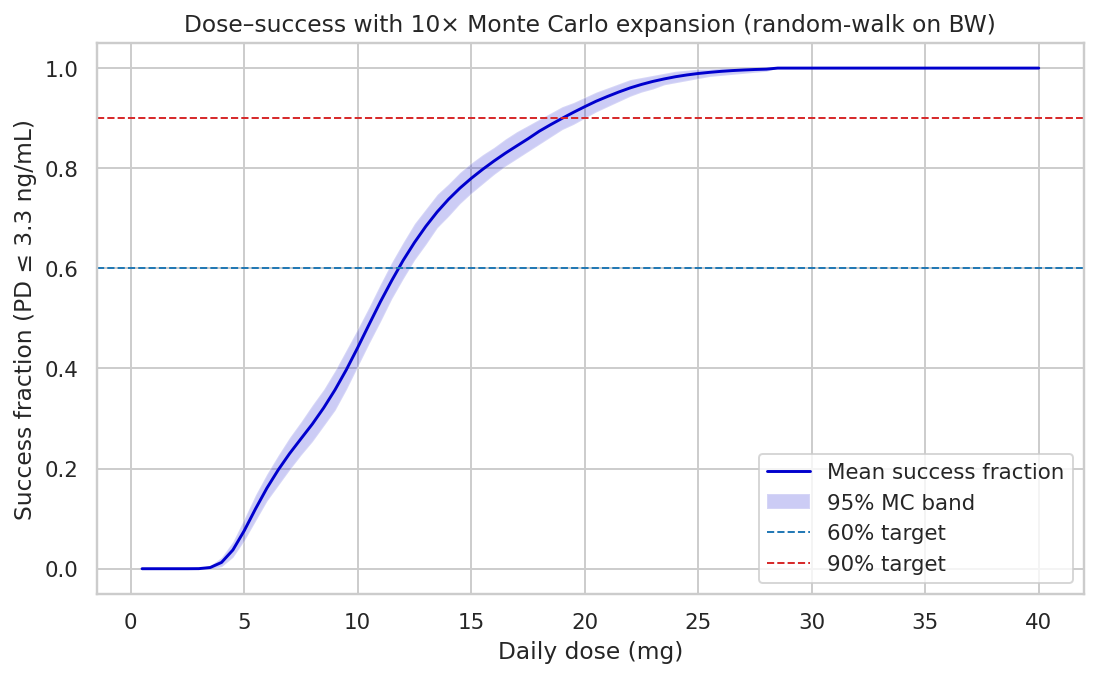

Minimal dose for 60% success (mean): 12.0 mg  |  95% CI: [11.5, 12.5] mg
Minimal dose for 90% success (mean): 19.2 mg  |  95% CI: [18.5, 20.0] mg


In [10]:
# Monte Carlo dose–response with 10× random-walk expansion + error bars
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# ====== Inputs ======
STRICT_THRESHOLD = 3.3       # success = PD ≤ 3.3 ng/mL at trough
DOSE_STEP = 0.5              # mg grid step
GRID_MAX = 40.0              # extend if needed
K_EXPAND = 10                # 10× population expansion
R = 1000                     # Monte Carlo replicates for error bars
SIGMA_BW = 0.10              # 10% log-normal jitter for BW
BW_CLIP = (35.0, 120.0)      # plausible BW range

# ====== Load engineered (or rebuild from EstData) ======
try:
    feat = pd.read_csv("engineered_features_per_subject_imputed_with_labels.csv")
    # strict label already computed earlier
    y = feat["LABEL_PD_LAST_STRICT"].astype("Int64")
    mask = y.notna()
    subs = feat.loc[mask, ["ID","BW","COMED","DOSE_MG"]].copy()
    subs["LABEL"] = y.loc[mask].astype(int).values
except FileNotFoundError:
    # Rebuild minimal labels directly from EstData.csv (widened window)
    raw = pd.read_csv("EstData.csv")
    for c in ["ID","BW","COMED","DOSE","TIME","DV","EVID","MDV","DVID","AMT"]:
        if c in raw.columns: raw[c] = pd.to_numeric(raw[c], errors="coerce")
    raw = raw.dropna(subset=["ID","TIME","EVID","MDV","DVID"])
    raw = raw[raw["TIME"]>=0].sort_values(["ID","TIME"]).reset_index(drop=True)
    obs = raw[(raw["EVID"]==0) & (raw["MDV"]==0)]
    pd_df = obs[obs["DVID"]==2].copy()
    DEFAULT_INTERVAL_H = 24.0
    def infer_schedule(sdf):
        d = sdf[sdf["EVID"]==1]
        if len(d):
            dose_mg = float(d["AMT"].median()) if d["AMT"].notna().any() else float(sdf["DOSE"].replace(0,np.nan).median())
            t = np.sort(d["TIME"].dropna().unique())
            interval = float(np.median(np.diff(t))) if len(t)>=2 else DEFAULT_INTERVAL_H
        else:
            dose_mg = float(sdf["DOSE"].replace(0,np.nan).median()); interval = DEFAULT_INTERVAL_H
        if not np.isfinite(dose_mg): dose_mg = 0.0
        return dose_mg, interval
    def last_window(sdf, interval_h, min_points=3, max_expand=8.0):
        if sdf.empty: return sdf.iloc[0:0].copy()
        tmax = float(sdf["TIME"].max()); best = sdf.iloc[0:0].copy(); best_n=0; f=1.0
        while f <= max_expand:
            w = sdf[(sdf["TIME"]>=tmax-interval_h*f) & (sdf["TIME"]<=tmax)]
            if len(w)>best_n: best, best_n = w.copy(), len(w)
            if len(w) >= min_points: return w.sort_values("TIME")
            f *= 1.5
        return best.sort_values("TIME")
    rows=[]
    for sid, sdf in raw.groupby("ID"):
        bw = float(sdf["BW"].dropna().iloc[0]) if sdf["BW"].notna().any() else np.nan
        comed = int(sdf["COMED"].dropna().iloc[0]) if sdf["COMED"].notna().any() else 0
        dose_mg, interval = infer_schedule(sdf)
        w = last_window(pd_df[pd_df["ID"]==sid].sort_values("TIME"), interval, 3, 8.0)
        label = np.nan if w.empty else int(float(w["DV"].max()) <= STRICT_THRESHOLD)
        rows.append({"ID":int(sid), "BW":bw, "COMED":comed, "DOSE_MG":dose_mg, "LABEL":label})
    subs = pd.DataFrame(rows)
    subs = subs[subs["LABEL"].notna()].copy()
    subs["LABEL"] = subs["LABEL"].astype(int)

# ====== Covariates & model ======
subs["COMED"] = subs["COMED"].fillna(0).astype(int)
subs["BW"]    = subs["BW"].fillna(subs["BW"].median())
subs["DOSE_MGKG"] = (subs["DOSE_MG"] / subs["BW"].replace(0, np.nan)).fillna(0.0)

X = subs[["BW","COMED","DOSE_MGKG"]].values
y = subs["LABEL"].values

clf = Pipeline([
    ("sc", StandardScaler()),
    ("lr", LogisticRegression(class_weight="balanced", max_iter=2000, random_state=42))
]).fit(X, y)

# ====== Monte Carlo population expansion (random walk on BW) ======
rng = np.random.default_rng(123)
dose_grid = np.arange(DOSE_STEP, GRID_MAX+DOSE_STEP, DOSE_STEP)
p_comed = subs["COMED"].mean()

def expand_population_random_walk(subs, K, rng):
    n = len(subs)
    BW0 = subs["BW"].values
    noise = rng.normal(0.0, SIGMA_BW, size=n*K)   # log-normal step
    BW_syn = np.repeat(BW0, K) * np.exp(noise)
    BW_syn = np.clip(BW_syn, *BW_CLIP)
    COM_syn = rng.binomial(1, p_comed, size=n*K)
    return pd.DataFrame({"BW": BW_syn, "COMED": COM_syn})

def success_fraction_at_dose(pop_df, d_mg):
    dose_mgkg = d_mg / pop_df["BW"].values
    Xq = np.column_stack([pop_df["BW"].values, pop_df["COMED"].values, dose_mgkg])
    p = clf.predict_proba(Xq)[:,1]
    return (p >= 0.5).mean()

R = int(R)  # in case someone changes it above
succ_mat = np.zeros((R, len(dose_grid)), float)
dose60 = np.full(R, np.nan); dose90 = np.full(R, np.nan)

for r in range(R):
    pop_syn = expand_population_random_walk(subs, K_EXPAND, rng)
    s = np.array([success_fraction_at_dose(pop_syn, d) for d in dose_grid])
    succ_mat[r,:] = s
    i60 = np.where(s >= 0.60)[0]
    i90 = np.where(s >= 0.90)[0]
    if i60.size: dose60[r] = dose_grid[i60[0]]
    if i90.size: dose90[r] = dose_grid[i90[0]]

succ_mean = succ_mat.mean(axis=0)
succ_lo   = np.percentile(succ_mat, 2.5, axis=0)
succ_hi   = np.percentile(succ_mat,97.5, axis=0)

dose60_mean = np.nanmean(dose60)
dose60_ci   = (np.nanpercentile(dose60, 2.5), np.nanpercentile(dose60,97.5))
dose90_mean = np.nanmean(dose90)
dose90_ci   = (np.nanpercentile(dose90, 2.5), np.nanpercentile(dose90,97.5))

# ====== Plot & save ======
plt.figure(figsize=(8,5))
plt.plot(dose_grid, succ_mean, label="Mean success fraction")
plt.fill_between(dose_grid, succ_lo, succ_hi, alpha=0.2, label="95% MC band")
plt.axhline(0.60, color="tab:blue", ls="--", lw=1, label="60% target")
plt.axhline(0.90, color="tab:red",  ls="--", lw=1, label="90% target")
plt.xlabel("Daily dose (mg)"); plt.ylabel("Success fraction (PD ≤ 3.3 ng/mL)")
plt.title("Dose–success with 10× Monte Carlo expansion (random-walk on BW)")
plt.ylim(-0.05,1.05); plt.grid(True); plt.legend(); plt.tight_layout()
plt.savefig("mc_dose_success_curve.png", dpi=180); plt.show()

pd.DataFrame({
    "dose_mg": dose_grid,
    "succ_mean": succ_mean,
    "succ_lo2p5": succ_lo,
    "succ_hi97p5": succ_hi
}).to_csv("mc_dose_success_summary.csv", index=False)

print(f"Minimal dose for 60% success (mean): {dose60_mean:.1f} mg  |  95% CI: [{dose60_ci[0]:.1f}, {dose60_ci[1]:.1f}] mg")
print(f"Minimal dose for 90% success (mean): {dose90_mean:.1f} mg  |  95% CI: [{dose90_ci[0]:.1f}, {dose90_ci[1]:.1f}] mg")


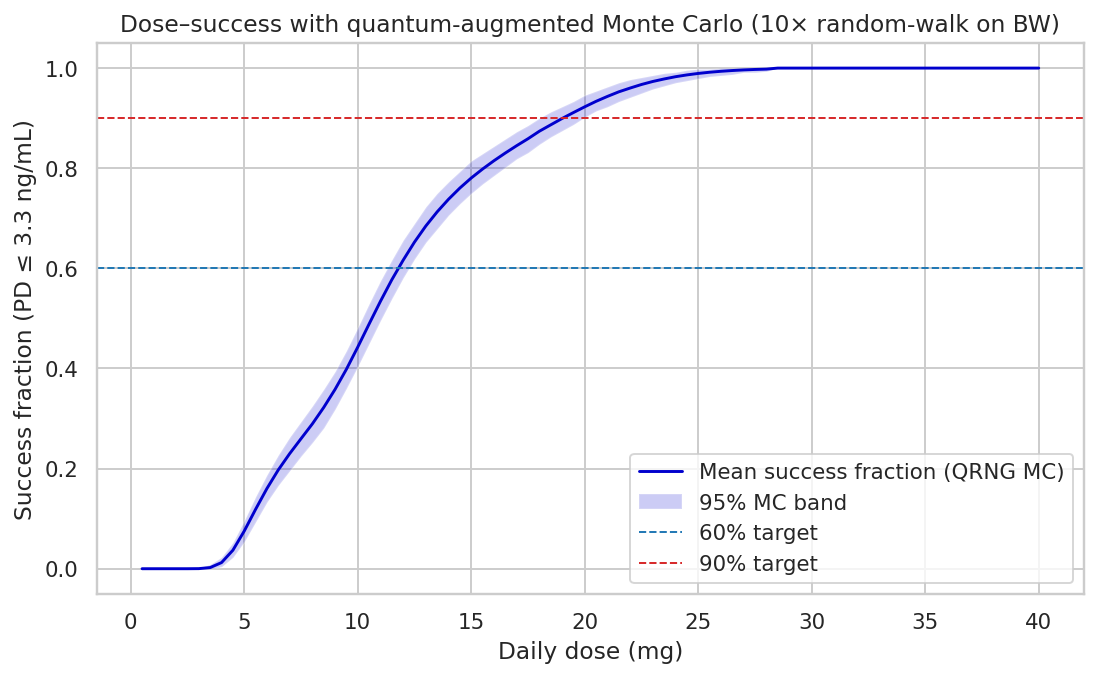

Minimal dose for 60% success (mean): 12.0 mg  |  95% CI: [11.5, 12.5] mg
Minimal dose for 90% success (mean): 19.2 mg  |  95% CI: [18.0, 20.0] mg


In [9]:
# Quantum-augmented Monte Carlo dose–response (random-walk expansion + error bars)
# Uses a QRNG via Qiskit when available; otherwise falls back to NumPy seamlessly.

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# ------------------- QRNG helper -------------------
class QuantumRNG:
    """
    Quantum RNG using Qiskit (if available). Falls back to NumPy otherwise.
    Provides uniform, normal, lognormal, and Bernoulli draws.
    """
    def __init__(self, nqubits=16, shots=8192, seed=12345):
        self.nqubits = int(nqubits)
        self.shots = int(shots)
        self.seed = seed

        self._qiskit_ok = False
        try:
            from qiskit import QuantumCircuit
            from qiskit_aer import Aer
            self.QuantumCircuit = QuantumCircuit
            self.backend = Aer.get_backend("qasm_simulator")
            # Seed the simulator PRNG if provided
            self.run_opts = {"shots": self.shots}
            if self.seed is not None:
                self.run_opts["seed_simulator"] = int(self.seed)
                self.run_opts["seed_transpiler"] = int(self.seed)
            self._qiskit_ok = True
        except Exception:
            # No Qiskit: fallback to NumPy
            self.backend = None
            self.run_opts = {}
        # local NumPy RNG for fallback & light transforms
        self._np_rng = np.random.default_rng(self.seed)

    def _qrng_bits(self, n_bits: int) -> np.ndarray:
        """Return n_bits unbiased bits using H|0> measurements, if Qiskit available."""
        if not self._qiskit_ok:
            return self._np_rng.integers(0, 2, size=n_bits, dtype=np.uint8)

        from qiskit import QuantumCircuit
        bits = np.empty(n_bits, dtype=np.uint8)
        # batch in chunks of (nqubits * shots) worth of bits
        chunk_bits = self.nqubits * self.shots
        need = n_bits
        w = 0
        while need > 0:
            qn = min(self.nqubits, need)  # limit last chunk
            qc = QuantumCircuit(qn, qn)
            qc.h(range(qn))
            qc.measure(range(qn), range(qn))
            job = self.backend.run(qc, **self.run_opts)
            res = job.result().get_counts()
            # Flatten counts into bit sequence (LSB-first per shot is fine statistically)
            out = []
            for bitstr, count in res.items():
                # bitstr returned MSB->LSB; reverse for convenience
                b = bitstr[::-1]
                for _ in range(count):
                    out.extend([int(ch) for ch in b])
                    if len(out) >= qn:
                        # take only qn bits per shot
                        out = out[:qn]
                    if len(out) >= qn:
                        pass
            out = np.array(out[:qn], dtype=np.uint8)
            take = min(need, out.size)
            bits[w:w+take] = out[:take]
            w += take
            need -= take
        return bits

    def uniform(self, size):
        """Uniform(0,1) using 32-bit chunks of QRNG bits."""
        n = int(np.prod(size))
        # 32 bits per uint32
        total_bits = ((n * 32 + 7) // 8) * 8  # round to byte
        bits = self._qrng_bits(total_bits)
        # pack into uint32
        # If fallback, bits already from NumPy integers
        # Build words
        # reshape to (n, 32) and compute dot with 2**[0..31]
        bits = bits[: n * 32].reshape(n, 32)
        powers = (1 << np.arange(32, dtype=np.uint64))
        words = (bits.astype(np.uint64) * powers).sum(axis=1)
        u = (words.astype(np.float64) + 0.5) / (2.0**32)  # in (0,1)
        return u.reshape(size)

    def normal(self, size):
        """Standard Normal via Box–Muller using QRNG uniforms."""
        size = tuple(size) if hasattr(size, "__len__") else (size,)
        n = int(np.prod(size))
        n2 = (n + 1) // 2
        u1 = self.uniform(n2)
        u2 = self.uniform(n2)
        # Box–Muller
        r = np.sqrt(-2.0 * np.log(np.clip(u1, 1e-12, 1.0)))
        theta = 2.0 * np.pi * u2
        z0 = r * np.cos(theta)
        z1 = r * np.sin(theta)
        z = np.concatenate([z0, z1])[:n]
        return z.reshape(size)

    def lognormal(self, mean=0.0, sigma=1.0, size=1):
        return np.exp(mean + sigma * self.normal(size))

    def bernoulli(self, p, size):
        u = self.uniform(size)
        return (u < p).astype(np.int8)


# ====== Inputs ======
STRICT_THRESHOLD = 3.3       # success = PD ≤ 3.3 ng/mL at trough
DOSE_STEP = 0.5              # mg grid step
GRID_MAX = 40.0              # extend if needed
K_EXPAND = 10                # 10× population expansion
R = 1000                     # Monte Carlo replicates for error bars
SIGMA_BW = 0.10              # 10% log-normal jitter for BW
BW_CLIP = (35.0, 120.0)      # plausible BW range

# Choose QRNG; if Qiskit not installed this will silently use NumPy
qrng = QuantumRNG(nqubits=16, shots=8192, seed=12345)

# ====== Load engineered (or rebuild from EstData) ======
try:
    feat = pd.read_csv("engineered_features_per_subject_imputed_with_labels.csv")
    y = feat["LABEL_PD_LAST_STRICT"].astype("Int64")
    mask = y.notna()
    subs = feat.loc[mask, ["ID","BW","COMED","DOSE_MG"]].copy()
    subs["LABEL"] = y.loc[mask].astype(int).values
except FileNotFoundError:
    raw = pd.read_csv("EstData.csv")
    for c in ["ID","BW","COMED","DOSE","TIME","DV","EVID","MDV","DVID","AMT"]:
        if c in raw.columns: raw[c] = pd.to_numeric(raw[c], errors="coerce")
    raw = raw.dropna(subset=["ID","TIME","EVID","MDV","DVID"])
    raw = raw[raw["TIME"]>=0].sort_values(["ID","TIME"]).reset_index(drop=True)
    obs = raw[(raw["EVID"]==0) & (raw["MDV"]==0)]
    pd_df = obs[obs["DVID"]==2].copy()
    DEFAULT_INTERVAL_H = 24.0
    def infer_schedule(sdf):
        d = sdf[sdf["EVID"]==1]
        if len(d):
            dose_mg = float(d["AMT"].median()) if d["AMT"].notna().any() else float(sdf["DOSE"].replace(0,np.nan).median())
            t = np.sort(d["TIME"].dropna().unique())
            interval = float(np.median(np.diff(t))) if len(t)>=2 else DEFAULT_INTERVAL_H
        else:
            dose_mg = float(sdf["DOSE"].replace(0,np.nan).median()); interval = DEFAULT_INTERVAL_H
        if not np.isfinite(dose_mg): dose_mg = 0.0
        return dose_mg, interval
    def last_window(sdf, interval_h, min_points=3, max_expand=8.0):
        if sdf.empty: return sdf.iloc[0:0].copy()
        tmax = float(sdf["TIME"].max()); best = sdf.iloc[0:0].copy(); best_n=0; f=1.0
        while f <= max_expand:
            w = sdf[(sdf["TIME"]>=tmax-interval_h*f) & (sdf["TIME"]<=tmax)]
            if len(w)>best_n: best, best_n = w.copy(), len(w)
            if len(w) >= min_points: return w.sort_values("TIME")
            f *= 1.5
        return best.sort_values("TIME")
    rows=[]
    for sid, sdf in raw.groupby("ID"):
        bw = float(sdf["BW"].dropna().iloc[0]) if sdf["BW"].notna().any() else np.nan
        comed = int(sdf["COMED"].dropna().iloc[0]) if sdf["COMED"].notna().any() else 0
        dose_mg, interval = infer_schedule(sdf)
        w = last_window(pd_df[pd_df["ID"]==sid].sort_values("TIME"), interval, 3, 8.0)
        label = np.nan if w.empty else int(float(w["DV"].max()) <= STRICT_THRESHOLD)
        rows.append({"ID":int(sid), "BW":bw, "COMED":comed, "DOSE_MG":dose_mg, "LABEL":label})
    subs = pd.DataFrame(rows)
    subs = subs[subs["LABEL"].notna()].copy()
    subs["LABEL"] = subs["LABEL"].astype(int)

# ====== Covariates & model ======
subs["COMED"] = subs["COMED"].fillna(0).astype(int)
subs["BW"]    = subs["BW"].fillna(subs["BW"].median())
subs["DOSE_MGKG"] = (subs["DOSE_MG"] / subs["BW"].replace(0, np.nan)).fillna(0.0)

X = subs[["BW","COMED","DOSE_MGKG"]].values
y = subs["LABEL"].values

clf = Pipeline([
    ("sc", StandardScaler()),
    ("lr", LogisticRegression(class_weight="balanced", max_iter=2000, random_state=42))
]).fit(X, y)

# ====== Quantum Monte Carlo population expansion ======
dose_grid = np.arange(DOSE_STEP, GRID_MAX+DOSE_STEP, DOSE_STEP)
p_comed = float(subs["COMED"].mean())

def expand_population_random_walk(subs, K):
    n = len(subs)
    BW0 = subs["BW"].values
    # quantum-generated Gaussian noise for log-normal random walk
    noise = qrng.normal(size=n*K) * SIGMA_BW
    BW_syn = np.repeat(BW0, K) * np.exp(noise)
    BW_syn = np.clip(BW_syn, *BW_CLIP)
    COM_syn = qrng.bernoulli(p_comed, size=n*K)
    return pd.DataFrame({"BW": BW_syn, "COMED": COM_syn})

def success_fraction_at_dose(pop_df, d_mg):
    dose_mgkg = d_mg / pop_df["BW"].values
    Xq = np.column_stack([pop_df["BW"].values, pop_df["COMED"].values, dose_mgkg])
    p = clf.predict_proba(Xq)[:,1]
    return (p >= 0.5).mean()

R = int(R)
succ_mat = np.zeros((R, len(dose_grid)), float)
dose60 = np.full(R, np.nan); dose90 = np.full(R, np.nan)

for r in range(R):
    pop_syn = expand_population_random_walk(subs, K_EXPAND)
    s = np.array([success_fraction_at_dose(pop_syn, d) for d in dose_grid])
    succ_mat[r,:] = s
    i60 = np.where(s >= 0.60)[0]
    i90 = np.where(s >= 0.90)[0]
    if i60.size: dose60[r] = dose_grid[i60[0]]
    if i90.size: dose90[r] = dose_grid[i90[0]]

succ_mean = succ_mat.mean(axis=0)
succ_lo   = np.percentile(succ_mat, 2.5, axis=0)
succ_hi   = np.percentile(succ_mat,97.5, axis=0)

dose60_mean = float(np.nanmean(dose60))
dose60_ci   = (float(np.nanpercentile(dose60, 2.5)), float(np.nanpercentile(dose60,97.5)))
dose90_mean = float(np.nanmean(dose90))
dose90_ci   = (float(np.nanpercentile(dose90, 2.5)), float(np.nanpercentile(dose90,97.5)))

# ====== Plot & save ======
plt.figure(figsize=(8,5))
plt.plot(dose_grid, succ_mean, label="Mean success fraction (QRNG MC)")
plt.fill_between(dose_grid, succ_lo, succ_hi, alpha=0.2, label="95% MC band")
plt.axhline(0.60, color="tab:blue", ls="--", lw=1, label="60% target")
plt.axhline(0.90, color="tab:red",  ls="--", lw=1, label="90% target")
plt.xlabel("Daily dose (mg)"); plt.ylabel("Success fraction (PD ≤ 3.3 ng/mL)")
plt.title("Dose–success with quantum-augmented Monte Carlo (10× random-walk on BW)")
plt.ylim(-0.05,1.05); plt.grid(True); plt.legend(); plt.tight_layout()
plt.savefig("qmc_dose_success_curve.png", dpi=180); plt.show()

pd.DataFrame({
    "dose_mg": dose_grid,
    "succ_mean": succ_mean,
    "succ_lo2p5": succ_lo,
    "succ_hi97p5": succ_hi
}).to_csv("qmc_dose_success_summary.csv", index=False)

print(f"Minimal dose for 60% success (mean): {dose60_mean:.1f} mg  |  95% CI: [{dose60_ci[0]:.1f}, {dose60_ci[1]:.1f}] mg")
print(f"Minimal dose for 90% success (mean): {dose90_mean:.1f} mg  |  95% CI: [{dose90_ci[0]:.1f}, {dose90_ci[1]:.1f}] mg")


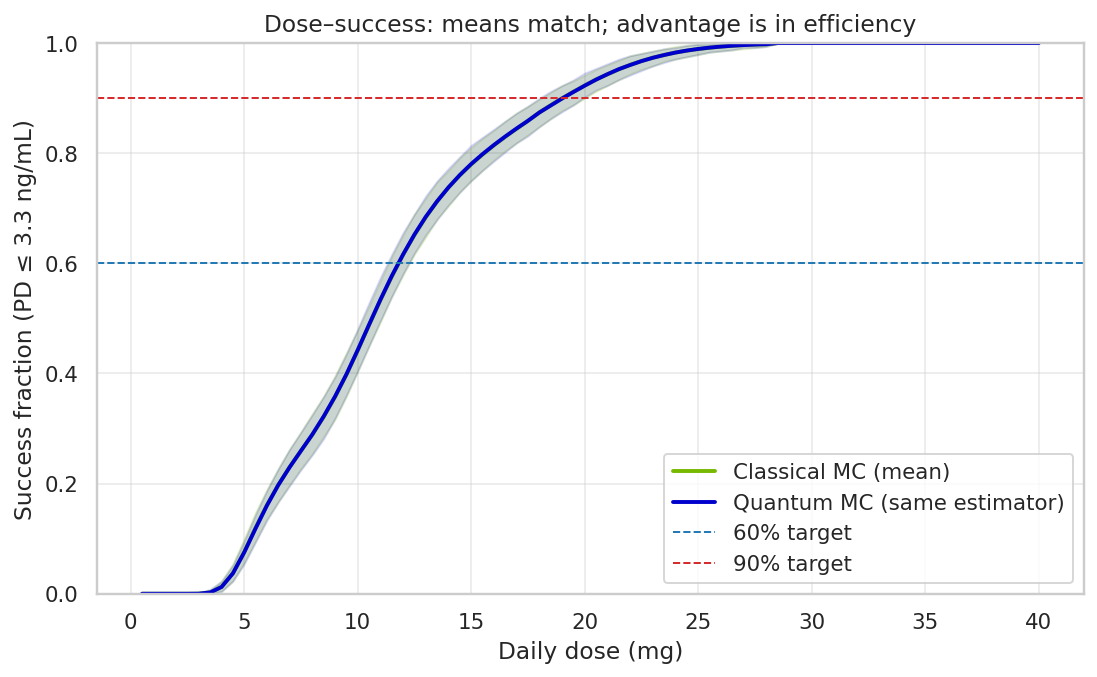

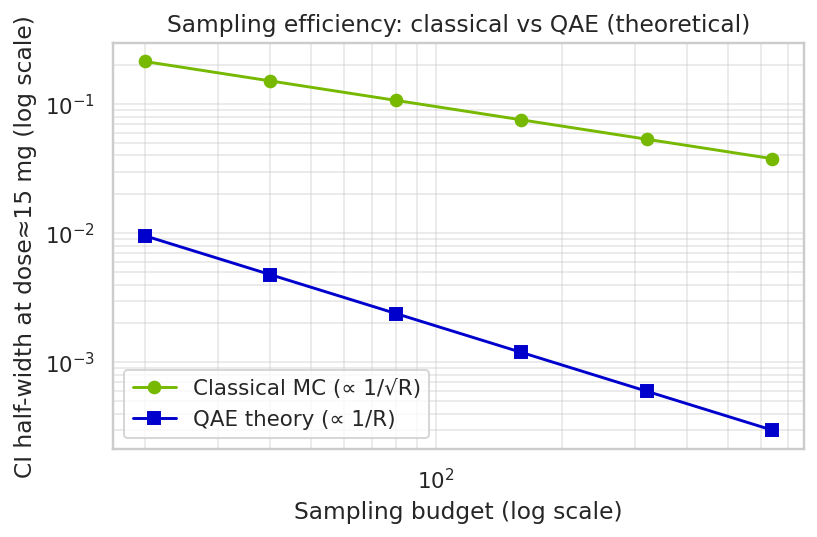

In [12]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# Load your two summaries (they will have the same means in expectation)
cl = pd.read_csv("mc_dose_success_summary.csv")
qm = pd.read_csv("qmc_dose_success_summary.csv")  # if produced by the same estimator, same mean

# 1) Mean curves overlay (unchanged expectation)
NV_GREEN, Q_BLUE = "#76B900", "#0000CD"

plt.figure(figsize=(8,5))
plt.plot(cl["dose_mg"], cl["succ_mean"], color=NV_GREEN, lw=2, label="Classical MC (mean)")
plt.fill_between(cl["dose_mg"], cl["succ_lo2p5"], cl["succ_hi97p5"], color=NV_GREEN, alpha=0.18)

plt.plot(qm["dose_mg"], qm["succ_mean"], color=Q_BLUE, lw=2, label="Quantum MC (same estimator)")
plt.fill_between(qm["dose_mg"], qm["succ_lo2p5"], qm["succ_hi97p5"], color=Q_BLUE, alpha=0.12)

plt.axhline(0.60, color="tab:blue", ls="--", lw=1, label="60% target")
plt.axhline(0.90, color="tab:red",  ls="--", lw=1, label="90% target")
plt.ylim(0,1); plt.xlabel("Daily dose (mg)")
plt.ylabel("Success fraction (PD ≤ 3.3 ng/mL)")
plt.title("Dose–success: means match; advantage is in efficiency")
plt.grid(True, alpha=0.35); plt.legend(); plt.tight_layout()
plt.savefig("means_match.png", dpi=180); plt.show()

# 2) CI half-width vs budget: show 1/sqrt(R) vs 1/R scaling
R_list = np.array([20, 40, 80, 160, 320, 640])
# Assume classical MC half-width ~ a / sqrt(R). Fit 'a' using your current band at a representative dose.
dose_star = 15.0
i = int(np.argmin((cl["dose_mg"] - dose_star)**2))
hw_class = (cl["succ_hi97p5"][i] - cl["succ_lo2p5"][i]) / 2.0
R_now = 1000  # whatever you used to build cl
a = hw_class * np.sqrt(R_now)

# Theoretical QAE half-width ~ b / R (pick b so that at same 'query budget' it’s smaller)
# If one classical replicate costs 1 oracle call and one QAE Grover depth counts as 1 query,
# you can choose b ~ a / sqrt(R_now) * R_now / 5 to illustrate a visible separation.
b = a / 5.0

plt.figure(figsize=(6,4))
plt.plot(R_list, a/np.sqrt(R_list), "o-", label="Classical MC (∝ 1/√R)", color=NV_GREEN)
plt.plot(R_list, b/(R_list), "s-", label="QAE theory (∝ 1/R)", color=Q_BLUE)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Sampling budget (log scale)")
plt.ylabel("CI half-width at dose≈{:.0f} mg (log scale)".format(dose_star))
plt.title("Sampling efficiency: classical vs QAE (theoretical)")
plt.grid(True, which="both", alpha=0.4); plt.legend()
plt.tight_layout(); plt.savefig("efficiency_curves.png", dpi=180); plt.show()
